In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plot_fits
import plot_vis
import glob
from pyuvdata import UVData, UVFlag
import warnings
import os
os.environ['HDF5_USE_FILE_LOCKING'] = 'FALSE'
import h5py
import hdf5plugin
from hera_cal import io
from hera_commissioning_tools import utils
import inspect
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
outdir = '/lustre/aoc/projects/hera/dstorer/Projects/updatedHeraOnFHD/2459855/plots'

In [3]:
flag_path = '/lustre/aoc/projects/hera/dstorer/Projects/updatedHeraOnFHD/2459855/ssinsFlagged'

In [4]:
flags = UVFlag()
flag_files = sorted(glob.glob(f'{flag_path}/*flags.h5'))
flags.read(flag_files)
flags = flags.flag_array[:,845:1090,0]

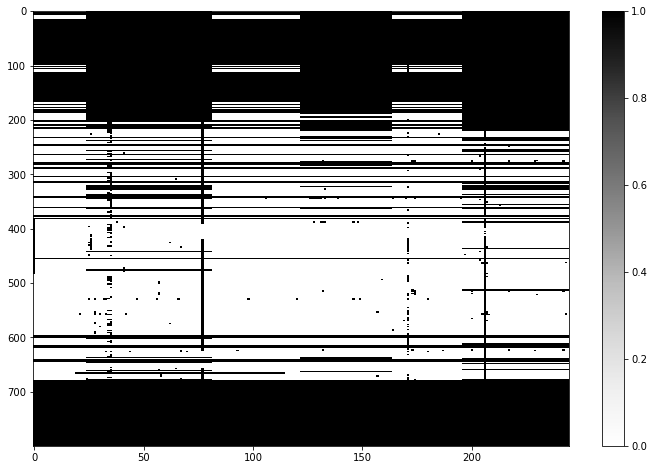

In [8]:
fig = plt.figure(figsize=(12,8))
im = plt.imshow(flags,aspect='auto',cmap='Greys',interpolation='nearest')
plt.colorbar(im)
# args = locals()
# curr_func = inspect.stack()[0][3]
outfig = f'{outdir}/flagging/855_flags.pdf'
plt.savefig(outfig,bbox_inches='tight')
utils.write_params_to_text(outfig,args={},flag_files=flag_files,freq_ind_cut=[845,1090])

In [7]:
data_path = '/lustre/aoc/projects/hera/dstorer/H6C_data/2459855'
data_files = sorted(glob.glob(f'{data_path}/*sum.uvh5'))

In [ ]:
hd = io.HERADataFastReader(data_files)
data, _, _ = hd.read(read_flags=False, read_nsamples=False)